In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
import os
import tqdm
import textwrap
import joblib
import string
from PIL import Image
from tensorflow import keras

In [2]:
data_images = "data/Images"
data_captions = "data/captions.txt"

In [3]:
data = pd.read_csv(data_captions)
data.head()

,image,caption
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...


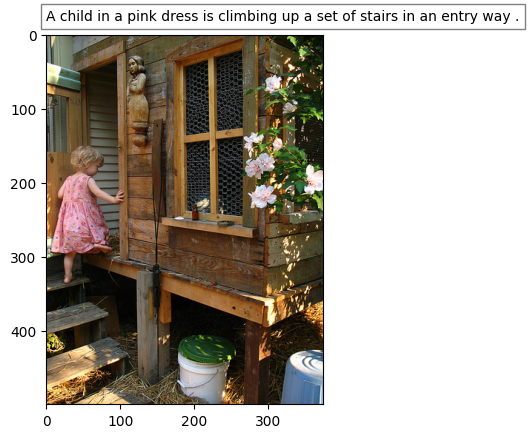

In [4]:
plt.imshow(Image.open(data_images + '/' + data['image'][0]))
plt.text(0, -20, data['caption'][0], bbox=dict(facecolor='white', alpha=0.5))
plt.show()

In [5]:
descriptions = {}
with open(data_captions, 'r') as file:
    _ = file.readline()
    line = file.readline()
    while line:
        index = line.strip().find(',')
        new_line = line[:index + 1] + line[index + 1:].replace(',', '').strip()

        image, caption = new_line.split(',')

        if image not in descriptions:
            descriptions[image] = [caption]
        else:
            descriptions[image].append(caption)

        line = file.readline()

list(descriptions.items())[:5]

[('1000268201_693b08cb0e.jpg',
  ['A child in a pink dress is climbing up a set of stairs in an entry way .',
   'A girl going into a wooden building .',
   'A little girl climbing into a wooden playhouse .',
   'A little girl climbing the stairs to her playhouse .',
   'A little girl in a pink dress going into a wooden cabin .']),
 ('1001773457_577c3a7d70.jpg',
  ['A black dog and a spotted dog are fighting',
   'A black dog and a tri-colored dog playing with each other on the road .',
   'A black dog and a white dog with brown spots are staring at each other in the street .',
   'Two dogs of different breeds looking at each other on the road .',
   'Two dogs on pavement moving toward each other .']),
 ('1002674143_1b742ab4b8.jpg',
  ['A little girl covered in paint sits in front of a painted rainbow with her hands in a bowl .',
   'A little girl is sitting in front of a large painted rainbow .',
   'A small girl in the grass plays with fingerpaints in front of a white canvas with a r

In [6]:
table = str.maketrans('', '', string.punctuation)
for img, caps in descriptions.items():
    for i, img_caption in enumerate(caps):

        img_caption.replace("-", " ")
        desc = img_caption.split()

        desc = [word.lower() for word in desc]
        desc = [word.translate(table) for word in desc]
        desc = [word for word in desc if (len(word) > 1)]
        desc = [word for word in desc if (word.isalpha())]

        descriptions[img][i] = ' '.join(desc)

list(descriptions.items())[:5]

[('1000268201_693b08cb0e.jpg',
  ['child in pink dress is climbing up set of stairs in an entry way',
   'girl going into wooden building',
   'little girl climbing into wooden playhouse',
   'little girl climbing the stairs to her playhouse',
   'little girl in pink dress going into wooden cabin']),
 ('1001773457_577c3a7d70.jpg',
  ['black dog and spotted dog are fighting',
   'black dog and tricolored dog playing with each other on the road',
   'black dog and white dog with brown spots are staring at each other in the street',
   'two dogs of different breeds looking at each other on the road',
   'two dogs on pavement moving toward each other']),
 ('1002674143_1b742ab4b8.jpg',
  ['little girl covered in paint sits in front of painted rainbow with her hands in bowl',
   'little girl is sitting in front of large painted rainbow',
   'small girl in the grass plays with fingerpaints in front of white canvas with rainbow on it',
   'there is girl with pigtails sitting in front of rainbo

In [9]:
lines = list()
for key, desc_list in descriptions.items():
    for desc in desc_list:
        lines.append(key + ',' + desc)
data = "\n".join(lines)
file = open("data/modified_captions.txt", "w")
file.write(data)
file.close()

data = pd.read_csv("data/modified_captions.txt", names=['image', 'caption'])
data.head()

,image,caption
0,1000268201_693b08cb0e.jpg,child in pink dress is climbing up set of stai...
1,1000268201_693b08cb0e.jpg,girl going into wooden building
2,1000268201_693b08cb0e.jpg,little girl climbing into wooden playhouse
3,1000268201_693b08cb0e.jpg,little girl climbing the stairs to her playhouse
4,1000268201_693b08cb0e.jpg,little girl in pink dress going into wooden cabin
